In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [264]:
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from collections import defaultdict
import random

In [12]:
df = pd.read_csv('../data/thur_data.csv')

In [51]:
df.shape

(1170, 208)

In [13]:
df.head()

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,active,...,3yr On The Fly Starts/60,3yr Off. Zone Start %,3yr Off. Zone Faceoffs/60,3yr Neu. Zone Faceoffs/60,3yr Def. Zone Faceoffs/60,3yr Off. Zone Faceoff %,3yr Season_Player,skater,forward,IPP
0,257,Francois,Beauchemin,Defense,1980-06-04,2015,NaN,NaN,4500000,1.0,...,37.42,44.15,18.72,19.48,22.41,45.52,2014 Francois Beauchemin,1,0,37.10
1,257,Francois,Beauchemin,Defense,1980-06-04,2017,NaN,NaN,1000000,1.0,...,38.43,40.28,18.01,18.32,24.65,42.21,2016 Francois Beauchemin,1,0,31.58
2,355,Brent,Burns,Defense,1985-03-09,2017,21.0,Sharks,8000000,1.0,...,33.86,59.57,24.67,19.01,18.78,56.77,2015 Brent Burns,1,0,59.52
3,371,Zdeno,Chara,Defense,1977-03-18,2018,3.0,Bruins,5000000,1.0,...,38.14,35.86,15.98,18.46,26.87,37.29,2017 Zdeno Chara,1,0,31.17
4,375,Jason,Chimera,Left Wing,1979-05-02,2016,NaN,NaN,2250000,1.0,...,48.74,54.90,17.71,19.89,16.46,51.83,2015 Jason Chimera,1,1,76.92


In [24]:
df.drop('Position', axis=1, inplace=True)

In [26]:
defense = df[df.position == 'Defense']
forwards = df[df.position != 'Defense']

In [33]:
defense.set_index(defense['Season_Player'], inplace=True)
forwards.set_index(forwards['Season_Player'], inplace=True)

In [31]:
list(defense.columns)

['player_id',
 'first_name',
 'last_name',
 'position',
 'birthdate',
 'season',
 'team_id',
 'team_name',
 'cap_hit',
 'active',
 'signing_date',
 'signing_team',
 'length',
 'contract_level',
 'expiry_status',
 'contract_type',
 'contract_end',
 'ufa_year',
 'total_value',
 'Player',
 'signing_year',
 'signing_age',
 'signing_year_cap',
 'cap_pct',
 'signing_status',
 'year_match',
 'Season_Player',
 'Season',
 'GP',
 'TOI',
 'Goals',
 'Total Assists',
 'First Assists',
 'Second Assists',
 'Total Points',
 'Shots',
 'iCF',
 'iFF',
 'iSCF',
 'iHDCF',
 'Rush Attempts',
 'Rebounds Created',
 'PIM',
 'Total Penalties',
 'Minor',
 'Major',
 'Misconduct',
 'Penalties Drawn',
 'Giveaways',
 'Takeaways',
 'Hits',
 'Hits Taken',
 'Shots Blocked',
 'Faceoffs Won',
 'Faceoffs Lost',
 'Season_index',
 'sum GP',
 'sum TOI',
 'sum Goals',
 'sum Total Assists',
 'sum First Assists',
 'sum Second Assists',
 'sum Total Points',
 'sum Shots',
 'sum iCF',
 'sum iFF',
 'sum iSCF',
 'sum iHDCF',
 'sum Ru

In [14]:
from sklearn.cluster import KMeans

In [28]:
dkm = KMeans(n_clusters = 3)

In [39]:
defense.shape

(408, 208)

In [161]:
defense['mean Giveaways/60'] = (defense['sum Giveaways'] / defense['sum TOI']) * 60
defense['mean Takeaways/60'] = (defense['sum Takeaways'] / defense['sum TOI']) * 60
defense['mean Shots Blocked/60'] = (defense['sum Shots Blocked'] / defense ['sum TOI']) * 60
defense['mean TP/60'] = (defense['sum Total Points']/defense['sum TOI']) * 60

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [364]:
Xd = defense[['mean Total Points', 'mean TP/60', 'TOI/GP', '3yr CF/60 Rel', '3yr CA/60 Rel', 
             'mean Giveaways/60', 'mean Takeaways/60', '3yr Off.\xa0Zone Starts/60', 
             '3yr Def.\xa0Zone Starts/60', 'mean Shots Blocked/60']]
yd = defense[['length', 'cap_hit']]

In [365]:
ss = StandardScaler()
Xds = ss.fit_transform(Xd)

In [366]:
dclus = dkm.fit_transform(Xds)

In [367]:
Xd['cluster'] = dkm.labels_

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [368]:
dclus0 = Xd[dkm.labels_ == 0].drop('cluster', axis=1)

In [369]:
dclus1 = Xd[dkm.labels_ == 1].drop('cluster', axis=1)

In [370]:
dclus2 = Xd[dkm.labels_ == 2].drop('cluster', axis=1)

In [371]:
dc0means, dc1means, dc2means = dclus0.mean(axis=0), dclus1.mean(axis=0), dclus2.mean(axis=0)

In [372]:
dc0means.index

Index(['mean Total Points', 'mean TP/60', 'TOI/GP', '3yr CF/60 Rel',
       '3yr CA/60 Rel', 'mean Giveaways/60', 'mean Takeaways/60',
       '3yr Off. Zone Starts/60', '3yr Def. Zone Starts/60',
       'mean Shots Blocked/60'],
      dtype='object')

In [373]:
dc0means

mean Total Points           5.261384
mean TP/60                  0.698446
TOI/GP                     14.610147
3yr CF/60 Rel              -1.496885
3yr CA/60 Rel              -2.838087
mean Giveaways/60           1.694190
mean Takeaways/60           0.803641
3yr Off. Zone Starts/60     9.794699
3yr Def. Zone Starts/60     7.442514
mean Shots Blocked/60       3.751663
dtype: float64

In [374]:
dclusts = []
dcmeans = []
for i in range(dkm.n_clusters):
    dclusts.append(Xd[dkm.labels_ == i].drop('cluster', axis=1))
    dcmeans.append(dclusts[i].mean(axis=0))

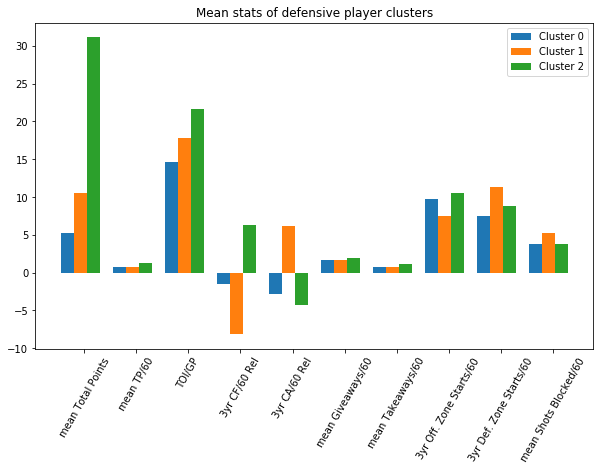

In [375]:
w = 0.25
idx = dcmeans[0].index

xx = np.arange(len(idx))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.bar(x = xx - w, height = dcmeans[0], width = w, label = 'Cluster 0')
ax.bar(x = xx, height = dcmeans[1], width = w, label = 'Cluster 1')
ax.bar(x = xx + w, height = dcmeans[2], width = w, label = 'Cluster 2')
ax.set_xticks(xx + w/3)
ax.set_xticklabels(idx, rotation = 60)


ax.legend()

ax.set_title('Mean stats of defensive player clusters')
plt.show()

In [376]:
dclus0.shape, dclus1.shape, dclus2.shape

((183, 10), (166, 10), (59, 10))

In [295]:
forwards['mean Giveaways/60'] = (forwards['sum Giveaways'] / forwards['sum TOI']) * 60
forwards['mean Takeaways/60'] = (forwards['sum Takeaways'] / forwards['sum TOI']) * 60
forwards['mean Shots Blocked/60'] = (forwards['sum Shots Blocked'] / forwards ['sum TOI']) * 60
forwards['mean TP/60'] = (forwards['sum Total Points']/forwards['sum TOI']) * 60

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [354]:
Xf = forwards[['mean Total Points', 'mean TP/60', 'TOI/GP', '3yr CF/60 Rel', '3yr CA/60 Rel', 
             'mean Giveaways/60', 'mean Takeaways/60', '3yr Off.\xa0Zone Starts/60', 
             '3yr Def.\xa0Zone Starts/60', 'mean Shots Blocked/60']]
yf = forwards[['length', 'cap_hit']]

In [355]:
ss = StandardScaler()
Xfs = ss.fit_transform(Xf)

In [356]:
fkm = KMeans(n_clusters = 4)

In [357]:
fclus = fkm.fit_transform(Xfs)

In [358]:
Xf['cluster'] = fkm.labels_

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [359]:
fkm.n_clusters

4

In [360]:
fclusts = []
fcmeans = []
for i in range(fkm.n_clusters):
    fclusts.append(Xf[fkm.labels_ == i].drop('cluster', axis=1))
    fcmeans.append(fclusts[i].mean(axis=0))

In [361]:
fcmeans[0].index

Index(['mean Total Points', 'mean TP/60', 'TOI/GP', '3yr CF/60 Rel',
       '3yr CA/60 Rel', 'mean Giveaways/60', 'mean Takeaways/60',
       '3yr Off. Zone Starts/60', '3yr Def. Zone Starts/60',
       'mean Shots Blocked/60'],
      dtype='object')

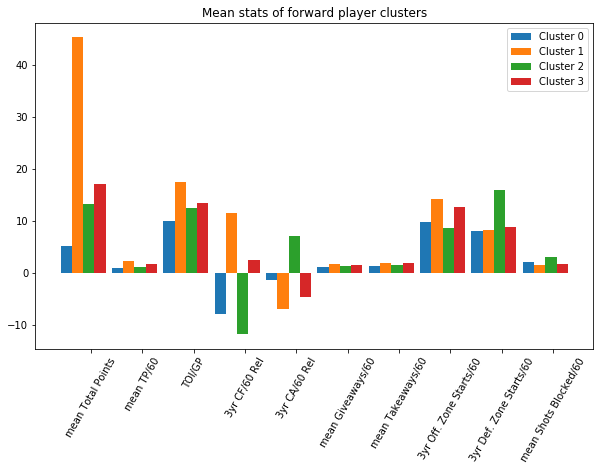

In [362]:
w = 0.22
idx = fcmeans[0].index

xx = np.arange(len(idx))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

#for i in fcmeans:
ax.bar(x = xx - 2*w, height = fcmeans[0], width = w, label = 'Cluster 0')
ax.bar(x = xx - w, height = fcmeans[1], width = w, label = 'Cluster 1')
ax.bar(x = xx, height = fcmeans[2], width = w, label = 'Cluster 2')
ax.bar(x = xx + w, height = fcmeans[3], width = w, label = 'Cluster 3')

ax.set_xticks(xx + w/5)
ax.set_xticklabels(idx, rotation = 60)


ax.legend()

ax.set_title('Mean stats of forward player clusters')
plt.show()

In [363]:
for i in fclusts:
    print(i.shape)

(241, 10)
(156, 10)
(156, 10)
(209, 10)


In [262]:
def k_means(X, k=5, max_iter=1000):
    """Performs k means
    Args:
    - X - feature matrix
    - k - number of clusters
    - max_iter - maximum iterations
    Returns:
    - clusters - dict mapping cluster centers to observations
    """
    centers = [tuple(pt) for pt in random.sample(list(X), k)]
    for i in range(max_iter):
        clusters = defaultdict(list)

        for datapoint in X:
            distances = [euclidean(datapoint, center) for center in centers]
            center = centers[np.argmin(distances)]
            clusters[center].append(datapoint)

        new_centers = []
        for center, pts in clusters.items():
            new_center = np.mean(pts, axis=0)
            new_centers.append(tuple(new_center))

        if set(new_centers) == set(centers):
            break

        centers = new_centers

    return clusters

In [254]:
def sse(clusters):
    """Sum squared euclidean distance of all points to their cluster center"""
    sum_squared_residuals = 0
    for center, pts in clusters.items():
        for pt in pts:
            sum_squared_residuals += euclidean(pt, center)**2
    return sum_squared_residuals

In [255]:
def plot_k_sse(X, min_k, max_k):
    """Plots sse for values of k between min_k and max_k
    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    sse_values = []
    for k in k_values:
        clusters = k_means(X, k=k)
        sse_values.append(sse(clusters))
    plt.plot(k_values, sse_values)
    plt.xlabel('k')
    plt.ylabel('sum squared error')
    plt.show()

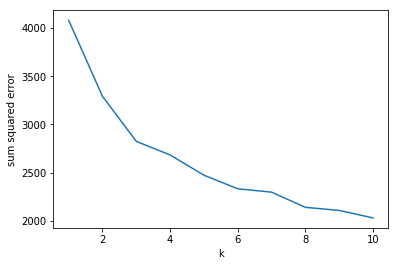

In [314]:
plot_k_sse(Xds, 1, 10)

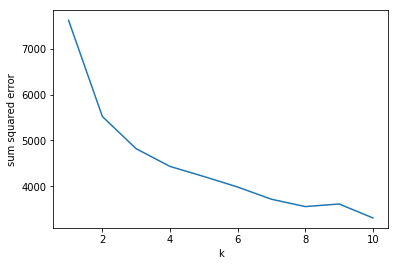

In [315]:
plot_k_sse(Xfs, 1, 10)

# Let's compare improvement from clustering to a benchmark of predicting the mean or median cap hit for every player.

In [329]:
allmean = df.cap_hit.mean()
allmed = df.cap_hit.median()
formean = forwards.cap_hit.mean()
formed = forwards.cap_hit.median()
defmean = defense.cap_hit.mean()
defmed = defense.cap_hit.median()

In [335]:
forwards.shape, defense.shape

((762, 212), (408, 212))

In [337]:
def rmse(yhat, y):
    return round(np.sqrt(((yhat - y)**2).mean()))

In [334]:
[(allmean, allmed), (formean, formed), (defmean, defmed)]

[(1959058.6435897436, 900000.0),
 (1950959.7598425196, 900000.0),
 (1974184.5, 900000.0)]

In [347]:
print('RMSE for predicting all means: ${}'.format(rmse(allmean, df.cap_hit)))
print('RMSE for predicting all medians: ${}'.format(rmse(allmed, df.cap_hit)))

RMSE for predicting all means: $1941304.0
RMSE for predicting all medians: $2211395.0


In [348]:
print('RMSE for predicting forward means: ${}'.format(rmse(formean, forwards.cap_hit)))
print('RMSE for predicting forward medians: ${}'.format(rmse(formed, forwards.cap_hit)))

RMSE for predicting forward means: $1972515.0
RMSE for predicting forward medians: $2235024.0


In [346]:
print('RMSE for predicting defense means: ${}'.format(rmse(defmean, defense.cap_hit)))
print('RMSE for predicting defense medians: ${}'.format(rmse(defmed, defense.cap_hit)))

RMSE for predicting defense means: $1881534.0
RMSE for predicting defense medians: $2166574.0


In [380]:
fmeancaphit = []
for x, i in enumerate(fclusts):
    cy = yf[fkm.labels_ == x]
    print('RMSE for forwards cluster {} mean: ${}'
          .format(x, rmse(cy.cap_hit.mean(), cy.cap_hit)))
    print('Mean cap hit for forwards cluster {}: ${}'.format(x, round(cy.cap_hit.mean())))

dmeancaphit = []
for x, i in enumerate(dclusts):
    cy = yd[dkm.labels_ == x]
    print('RMSE for defense cluster {} mean: ${}'
          .format(x, rmse(cy.cap_hit.mean(), cy.cap_hit)))
    print('Mean cap hit for defense cluster {}: ${}'.format(x, round(cy.cap_hit.mean())))

RMSE for forwards cluster 0 mean: $282063.0
Mean cap hit for forwards cluster 0: $743504
RMSE for forwards cluster 1 mean: $2128344.0
Mean cap hit for forwards cluster 1: $4949133
RMSE for forwards cluster 2 mean: $954985.0
Mean cap hit for forwards cluster 2: $1312304
RMSE for forwards cluster 3 mean: $1095837.0
Mean cap hit for forwards cluster 3: $1582118
RMSE for defense cluster 0 mean: $590399.0
Mean cap hit for defense cluster 0: $911904
RMSE for defense cluster 1 mean: $1533417.0
Mean cap hit for defense cluster 1: $2042935
RMSE for defense cluster 2 mean: $1911022.0
Mean cap hit for defense cluster 2: $5075623
